In [ ]:
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train , x_test = x_train/255 , x_test/255
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(28,activation='softmax')               
])

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3174 - accuracy: 0.9086 - val_loss: 0.1478 - val_accuracy: 0.9562
Epoch 2/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1479 - accuracy: 0.9562 - val_loss: 0.0990 - val_accuracy: 0.9702
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1120 - accuracy: 0.9666 - val_loss: 0.0912 - val_accuracy: 0.9734
Epoch 4/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0894 - accuracy: 0.9734 - val_loss: 0.0840 - val_accuracy: 0.9753
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0777 - accuracy: 0.9765 - val_loss: 0.0744 - val_accuracy: 0.9775
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0684 - accuracy: 0.977

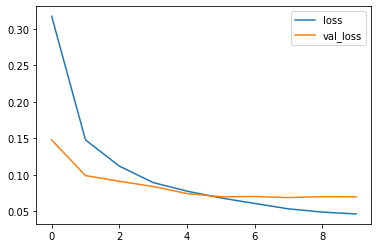

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

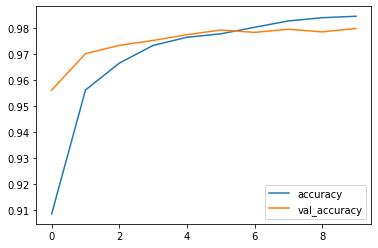

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0699 - accuracy: 0.9799
[0.06991993244591868, 0.9799]


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize= False,title='Confusion Matrix', cmap = plt.cm.Blues): 
  if normalize:
    cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Not Normalized confusion matrix')
  print(cm)
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks =np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation='45')
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text( j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
            color = "white" if cm[i, j] > thresh else "black"
    )
    plt.tight_layout()
    plt.ylabel('Ture value')
    plt.xlabel('predicted value')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

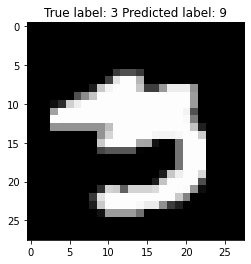

In [ ]:
misclassfied_idx = np.where( p_test != y_test)[0]
i= np.random.choice(misclassfied_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" % (y_test[i], p_test[i])) ; 